In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from Ricker_functions import *

In [2]:
x_0 = 5 
T = 200
r, sigma, phi = np.exp(2.8), 0.5, 3
theta = np.asarray([r, sigma, phi])

X, Y = simulate_data(x_0, T, theta)

### Does it track?

* Start at wrong positions

(101, 201)

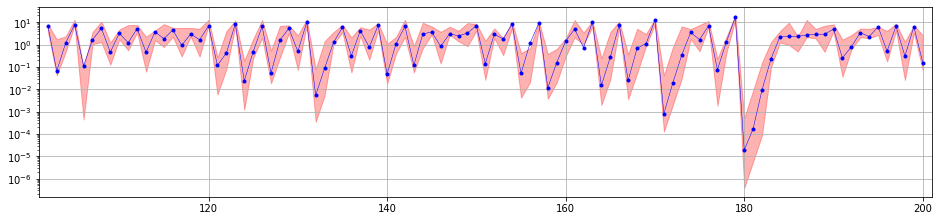

In [3]:
N_PF = 10_000
initial = np.exp(10*npr.randn(N_PF))
t_start, t_end = 101, 200
logNC, particles, weights = bootstrap_PF(initial, N_PF, theta, Y[t_start:t_end]) 

plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(1+np.arange(t_start,t_end), X[t_start:t_end], 'bo-', markersize=3, lw=0.5)
plt.fill_between(1+np.arange(t_start,t_end), np.percentile(particles[1:],axis=1,q=5), 
                 np.percentile(particles[1:],axis=1,q=95), color='red', alpha=.3)
plt.grid(True)
plt.yscale('log')
plt.xlim(t_start,t_end+1)

### Particle MCMC:

In [23]:
n_mcmc = 5_000
n_pf = 200
scale = np.asarray([0.044, 0.056, 0.025])
theta_chain, scales = pMCMC(x_0, Y, theta, n_pf, n_mcmc, scale/100, power=10, adapt=False)

 41%|████      | 2050/5000 [00:37<00:59, 49.62it/s]/home/postdoc/dsen/Desktop/codes/DC-BATS/scalable_pseudo_marginal/Ricker_functions.py:46: RuntimeWarning: overflow encountered in power
  return np.exp(-ϕ*particles)*(ϕ*particles)**y/float(factorial(y))
/home/postdoc/dsen/Desktop/codes/DC-BATS/scalable_pseudo_marginal/Ricker_functions.py:46: RuntimeWarning: invalid value encountered in multiply
  return np.exp(-ϕ*particles)*(ϕ*particles)**y/float(factorial(y))
 41%|████      | 2055/5000 [00:37<00:59, 49.35it/s]/home/postdoc/dsen/Desktop/codes/DC-BATS/scalable_pseudo_marginal/Ricker_functions.py:59: RuntimeWarning: divide by zero encountered in log
  logNC += np.log(np.sum(weights))
/home/postdoc/dsen/Desktop/codes/DC-BATS/scalable_pseudo_marginal/Ricker_functions.py:35: RuntimeWarning: invalid value encountered in true_divide
  weights /= np.sum(weights)
100%|██████████| 5000/5000 [01:37<00:00, 50.64it/s]


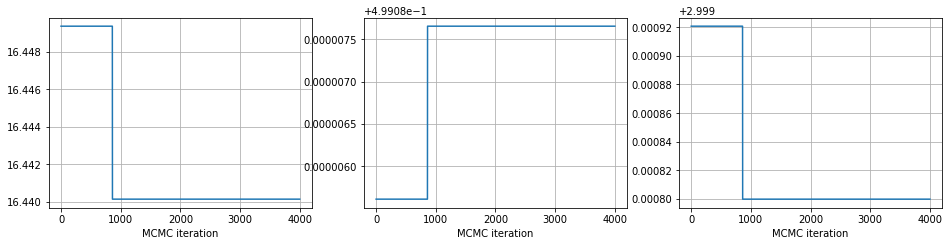

In [24]:
for i in range(3) :
    plt.subplot(1,3,i+1)
    plt.plot(theta_chain[1000:,i])
    plt.grid(True)
    plt.xlabel("MCMC iteration")

In [9]:
scales

array([[0.044     , 0.056     , 0.025     ],
       [0.044     , 0.056     , 0.025     ],
       [0.044     , 0.056     , 0.025     ],
       ...,
       [0.08037298, 0.08112774, 0.02999297],
       [0.08037004, 0.08112224, 0.02999056],
       [0.0803671 , 0.08111675, 0.02998815]])